$$\require{mhchem}$$       

# Problem 1: Catalytic packed bed reactor sizing

We want to oxidize CO to $\ce{CO2}$ with the reaction:
\begin{align*}
\ce{CO + 1/2O2 -> CO2}
\end{align*}
The rate is assumed to follow Hougen-Watson kinetics of the form
\begin{align*}
r=\frac{k C_{CO}C_{O2}}{1+KC_{CO}}
\end{align*}
with $k=9.73\times 10^{12} \exp^{-13,500/T}$ cm$^3$/mol$\cdot s\cdot(g_{catalyst})$ and $K=8.099\times 10^6\exp^{409/T}$ cm$^3$/mol, where $T$ is in Kelvin. The feed to the reactor is 2 mol% $\ce{CO}$, 10 mol% $\ce{O2}$, and the rest inert. Total inlet pressure is 6 atm, and total inlet molar flow rate is 0.1 mol/s. The reactor operates isothermally at 838 K. The catalyst packed bed can be modeled with an effective $\alpha=0.00004$/(g catalyst). 

## Part 1A:  Does the flow rate to the reactor matter for determining the final conversion? Why? (1 pt)

## Part 1B:  Determine the concentration and flow rate of each species at the inlet for an arbitrary inlet molar flow rate (2 pt)

In [8]:
T = 838              # Operating temperature, K
R = 82.057           # Gas constant, cm^3 atm /mol/K
P0 = 6               # Total inlet pressure, atm
Ca0 = 0.02*P0/T/R    # Inlet CO concentration, mol/cm^3
Cb0 = 0.1*P0/T/R     # Inlet O2 concentration, mol/cm^3
Cc0 = 0.             # Inlet CO2 concentration, mol/cm^3

print('Ca = %f mol/cm^3' % Ca0)
print('Cb = %f mol/cm^3' % Cb0)
print('Cc = %f mol/cm^3' % Cc0)

Ft0 = 0.1                 # Total flowrate, mol/s
Fa0 = 0.02*Ft0            # CO flowrate, mol/s
Fb0 = 0.1*Ft0             # O2 flowrate, mol/s
Fc0 = 0.                  # CO2 flowrate, mol/s
Fi0 = Ft0-Fa0-Fb0-Fc0     # Inert gas flowrate, mol/s

print('Fa = %f mol/cm^3' % Fa0)
print('Fb = %f mol/cm^3' % Fb0)
print('Fc = %f mol/cm^3' % Fc0)

Ca = 0.000002 mol/cm^3
Cb = 0.000009 mol/cm^3
Cc = 0.000000 mol/cm^3
Fa = 0.002000 mol/cm^3
Fb = 0.010000 mol/cm^3
Fc = 0.000000 mol/cm^3


## Part 1C:  Plot the concentrations of $CO$, $O_2$, and $CO_2$ as a function of the mass of catalyst that the flow has passed over. Do the same for the outlet pressure. Carry out the plots through 5 kg catalyst mass. (2pt)

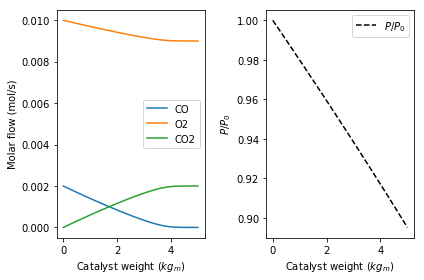

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

k = 9.73*10**12*np.exp(-13500/T)
K = 8.099*10**6*np.exp(409/T)
alpha = 0.00004   # /g cat

def ode(F, W, P0):
    '''
    Calculate four simultaneous differential equations
    
    Inputs:
        F    A list whose first element is the current concentration of A;
             second element is the current concentration of B; third element
             is the current concentration of C; and fourth element is the current
             relative pressure (i.e., current pressure divided by the initial pressure)
        W    The amount of catalyst weight that the species' have been exposed to (g)
        P0   The inlet pressure (atm)
    Outputs:
        dFadW  The first is the change in concentration of species A (CO) as a function of
               catalyst weight
        dFadW  The change in concentration of species A (CO) as a function of catalyst weight
        dFbdW  The change in concentration of species B (O2) as a function of catalyst weight
        dFcdW  The change in concentration of species C (CO2) as a function of catalyst weight
        dydW   The change in pressure relative to the initial pressure.
    '''
    # Unpack the elements inside `F` and calculate the total molar flowrate, `Ft`.
    # Note that `y` is the current relative pressure.
    Fa, Fb, Fc, y = F
    Ft = Fa+Fb+Fc+Fi0
    
    # Get the total molar concentration from ideal gas
    C = P0*y/T/R
    Ca = Fa/Ft*C
    Cb = Fb/Ft*C
    Cc = Fc/Ft*C
    
    # Use the molar concentrations to calculate reaction rates and differentials
    r = k*Ca*Cb/(1+K*Ca)
    dFadW = -r
    dFbdW = -1/2*r
    dFcdW = r
    dydW = -alpha/2/y*Ft/Ft0
    return [dFadW, dFbdW, dFcdW, dydW]

# Starting point for flowrates. The final element in this vector is the pressure relative
# to the inlet pressure
F0 = [Fa0, Fb0, Fc0, 1.0]

Wspan = np.linspace(0, 5000)

sol = odeint(ode, F0, Wspan, args=(6, ))

Fa = sol[:, 0]
Fb = sol[:, 1]
Fc = sol[:, 2]
y = sol[:, 3]

plt.subplot(1, 2, 1) # subplot with two columns in one row
plt.plot(Wspan/1000, sol[:, 0:3]) # plot columns 0, 1, 2

plt.legend(['CO', 'O2', 'CO2'])
plt.xlabel('Catalyst weight ($kg_m$)')
plt.ylabel('Molar flow (mol/s)')

plt.subplot(1, 2, 2)
plt.plot(Wspan/1000, sol[:, 3], 'k--') # plot column 3
plt.xlabel('Catalyst weight ($kg_m$)')
plt.ylabel('$P/P_0$')
plt.legend(['$P/P_0$'], loc='upper right')

plt.tight_layout()
plt.show()

## Part 1D:  The reactor outlet is collected in an unpressured tank at 1.0 atm.   Determine the inlet pressure necessary to operate a reactor with 5 kg of catalyst such that the outlet pressure is 1 atm. (2 pt)

In [3]:
from scipy.optimize import fsolve

def obj(P0):
    sol = odeint(ode, F0, Wspan, args=(P0,))
    return P0*sol[-1, 3] - 1

Pinlet = fsolve(obj, 6)
print('Optimal P_inlet = %f atm' % Pinlet[0])

Optimal P_inlet = 1.117874 atm


## Part 1E:  Before acquiring a new packed bed reactor, you realize that you already have a PBR that holds 50 kg of catalyst. Plot the molar flow rates and pressure for each species along the length of this new reactor.  Discuss the behavior and describe where the model is breaking down.  (3 pt)

/opt/conda/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


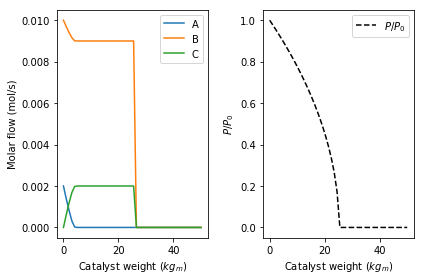

In [4]:
Wspan = np.linspace(0, 50000)

sol = odeint(ode, F0, Wspan, args = (P0, ))

import matplotlib.pyplot as plt

Fa = sol[:, 0]
Fb = sol[:, 1]
Fc = sol[:, 2]
y = sol[:, 3]

plt.subplot(1, 2, 1) # subplot with two columns in one row
plt.plot(Wspan/1000, sol[:, 0:3]) # plot columns 0, 1, 2

plt.legend(['A', 'B', 'C'])
plt.xlabel('Catalyst weight ($kg_m$)')
plt.ylabel('Molar flow (mol/s)')

plt.subplot(1, 2, 2)
plt.plot(Wspan/1000, sol[:, 3], 'k--') # plot column 3
plt.xlabel('Catalyst weight ($kg_m$)')
plt.ylabel('$P/P_0$')
plt.legend(['$P/P_0$'], loc='upper right')

plt.tight_layout()
plt.show()

# Problem 2:  Transient CSTR

We have a 20 L transient CSTR, with the following reactions:
\begin{align*}
\ce{A&->[k_1] X}\\
\ce{2X + Y &->[k_2] 3 X}\\
\ce{B + X &->[k_3]  Y + D}\\
\ce{X &->[k_4] E}
\end{align*}
The initial concentration for A is 1 M, B is 3 M, X and Y are 0.01 M. The initial concentration for D and E are 0 M. The rate constants are $k_1=0.1\:s^{-1}$, $k_2=10^5 M^{-2}s^{-1}$, $k_3=10\: M^{-1}s^{-1}$ and $k_4=10\:s^{-1}$ 

## Part 2A:  The operators report that when they load the initial batch into the reactor they observe some strange behavior, even without an inflow or outflow into the CSTR. First, calculate the concentration profiles for all of the species for the first 30 seconds after loading the CSTR, using a logarithmic y-axis. (4 pt)

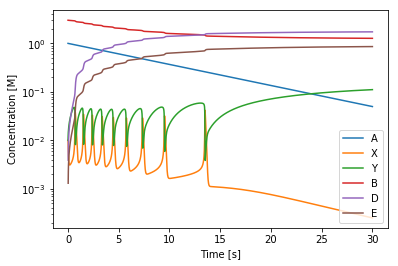

In [5]:
k1 = 0.1
k2 = 10**5
k3 = 10
k4 = 10
stoich_coefficients = np.array([[-1,1,0,0,0,0],
                                [0,1,-1,0,0,0],
                                [0,-1,1,-1,1,0],
                                [0,-1,0,0,0,1]])
def dCdt(C,t):
    Ca, Cx, Cy, Cb, Cd, Ce = C
    r1 = k1*Ca
    r2 = k2*Cx**2*Cy
    r3 = k3*Cb*Cx
    r4 = k4*Cx
    dCdt = np.matmul(stoich_coefficients.transpose(), [r1, r2, r3, r4])
    return dCdt

tspan = np.linspace(0, 30, 2000)
C0 = [1, 0.01, 0.01, 3, 0 ,0]
sol = odeint(dCdt, C0, tspan)

plt.semilogy(tspan,sol)
plt.legend(['A','X','Y','B','D','E'])
plt.xlabel('Time [s]')
plt.ylabel('Concentration [M]')
plt.show()


## Part 2B:  You suggest that the stability of the system can be improved by using a suitably large inflow/outflow to the CSTR to force it into a stable trajectory. For an inlet stream of 50 L/s with 1 M A and 1 M B, calculate the new startup concentration profile. (4 pt)

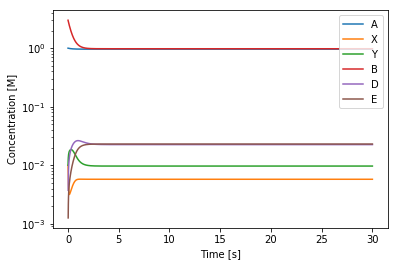

In [6]:
V = 20
nu = 50

Cin = np.array([1, 0, 0, 1, 0, 0])

def dCdt(C,t):
    Ca, Cx, Cy, Cb, Cd, Ce = C
    r1 = k1*Ca
    r2 = k2*Cx**2*Cy
    r3 = k3*Cb*Cx
    r4 = k4*Cx
    dCdt = np.matmul(stoich_coefficients.transpose(), [r1, r2, r3, r4]) + Cin*nu/V - C*nu/V
    return dCdt

tspan = np.linspace(0, 30, 2000)
C0 = [1, 0.01, 0.01, 3, 0, 0]
sol = odeint(dCdt, C0, tspan)

plt.semilogy(tspan, sol[:])
plt.legend(['A', 'X', 'Y', 'B', 'D', 'E'])
plt.xlabel('Time [s]')
plt.ylabel('Concentration [M]')
plt.show()

## Part 2C:  After thinking some more about the problem, you realize that you don't even need the inlet and otulet flow to force stability on the startup. Simply reducing the starting concentration of B should be enough. Find a concentration of B such that X decreases monotonically during startup.   (2 pt)

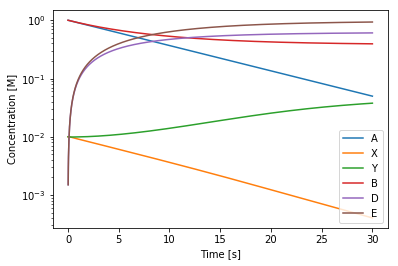

In [7]:
def dCdt(C,t):
    Ca, Cx, Cy, Cb, Cd, Ce = C
    r1 = k1*Ca
    r2 = k2*Cx**2*Cy
    r3 = k3*Cb*Cx
    r4 = k4*Cx
    dCdt = np.matmul(stoich_coefficients.transpose(), [r1, r2, r3, r4])
    return dCdt

tspan = np.linspace(0, 30, 2000)
C0 = [1., 0.01, 0.01, 1., 0., 0.]
sol = odeint(dCdt, C0, tspan)

plt.semilogy(tspan, sol[:])
plt.legend(['A', 'X', 'Y', 'B', 'D', 'E'])
plt.xlabel('Time [s]')
plt.ylabel('Concentration [M]')
plt.show()

## Bonus

## What's going on here? What about these equations causes this sort of instability? (1 pt)